To do:
1. Define GP inference function for Sphere/3d
2. Export various data sets in 3d

In [1]:
#Libraries:
#Tensors:
import torch
import numpy as np

#Plotting in 2d/3d:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline

#Tools:
from itertools import product, combinations
import sys
import math
from numpy import savetxt
import csv

sys.path.append("../..")
import Kernel_and_GP_tools as GP


ModuleNotFoundError: No module named 'Kernel_and_GP_tools'

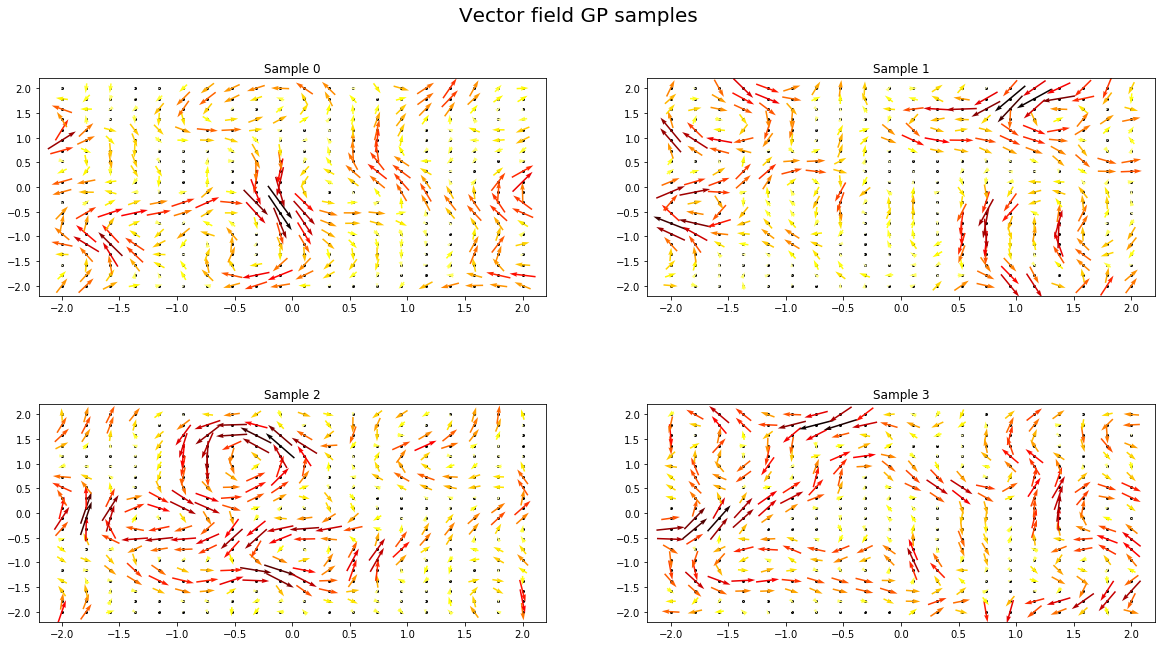

In [42]:
fig,ax=GP.rand_plot_2d_vec_GP(n_grid_points=20,kernel_type="div_free",l_scale=0.2)

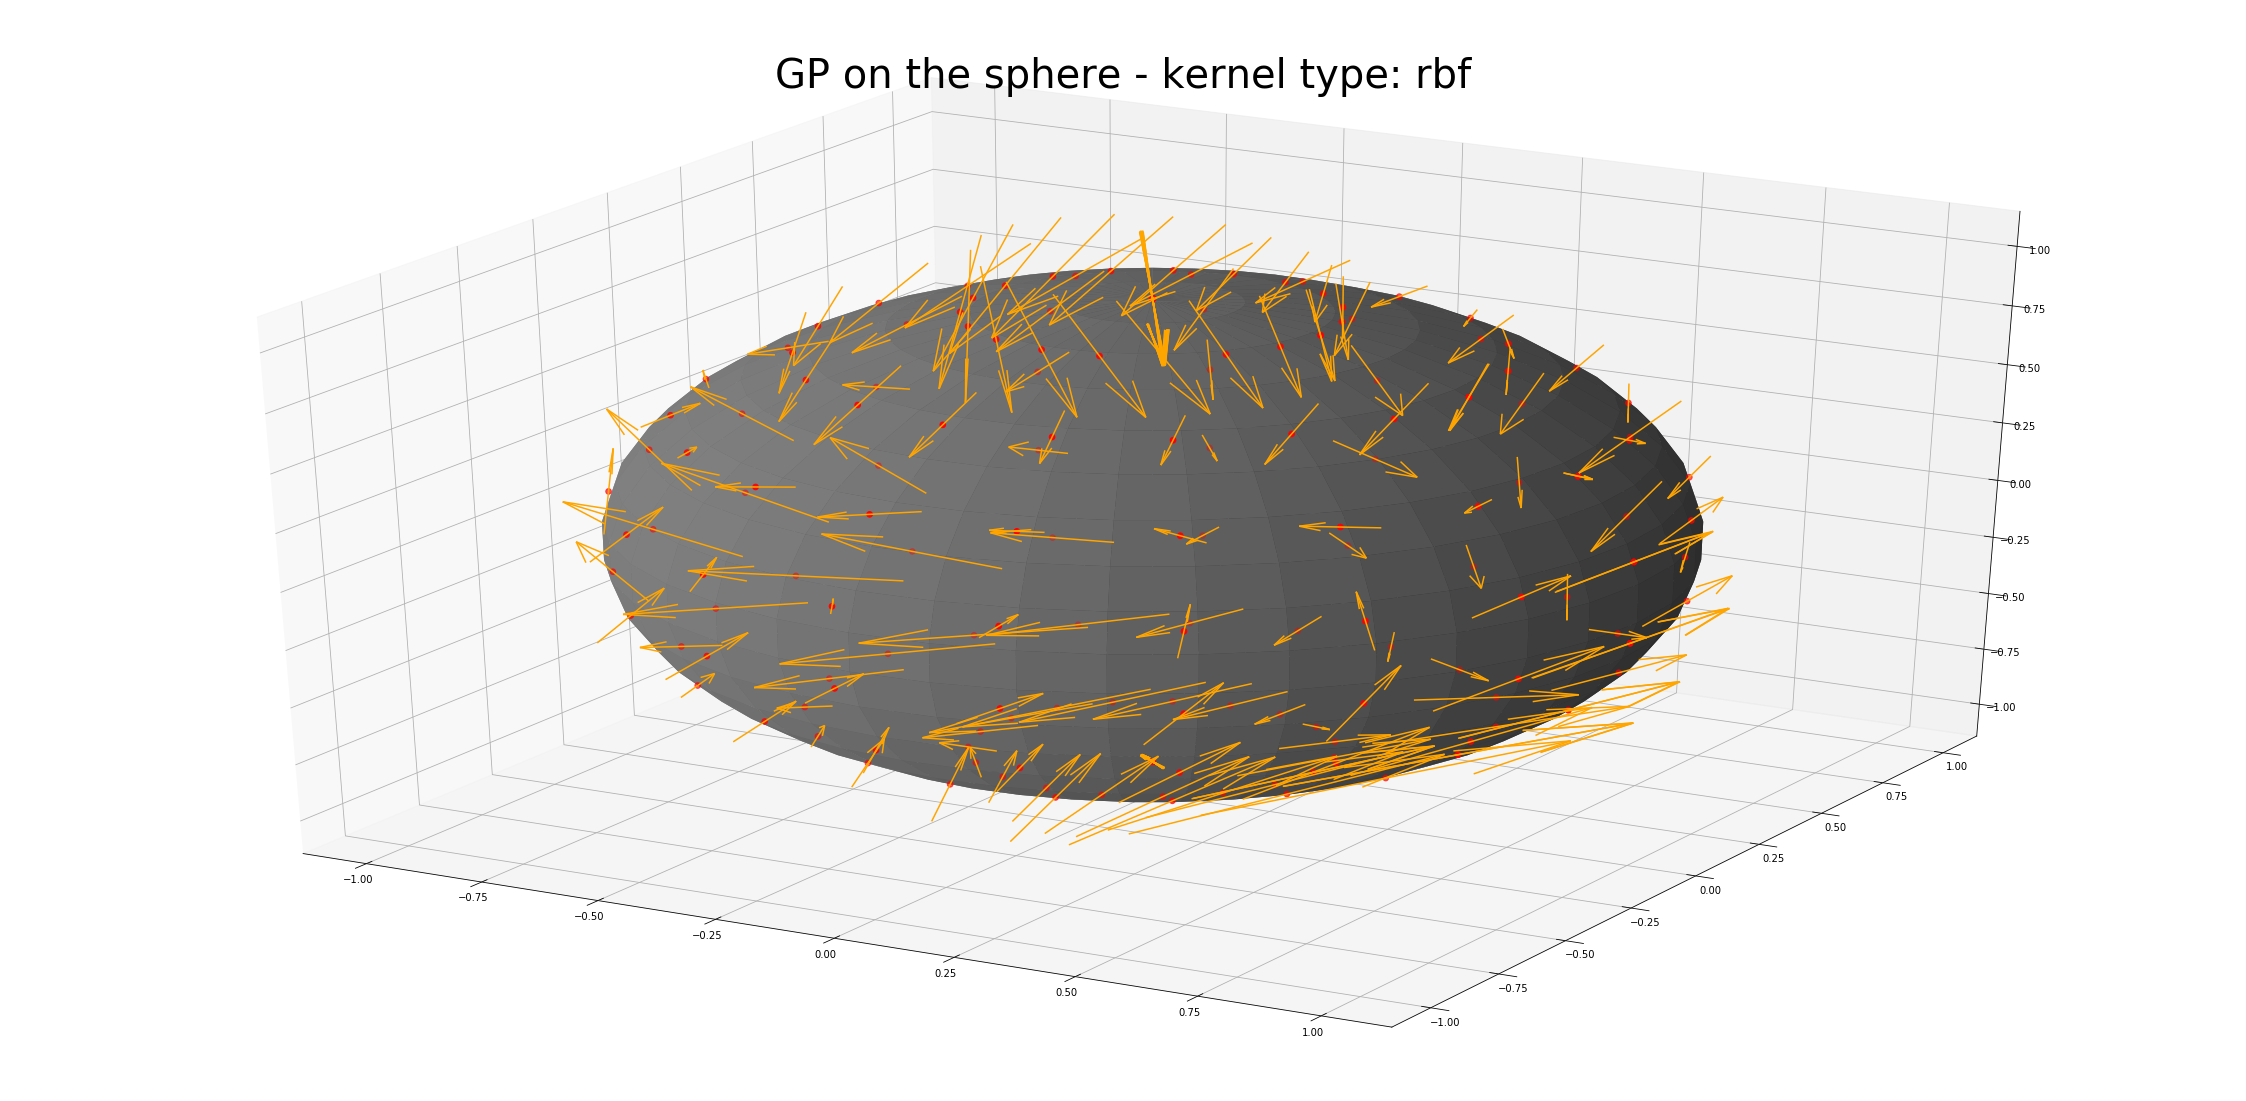

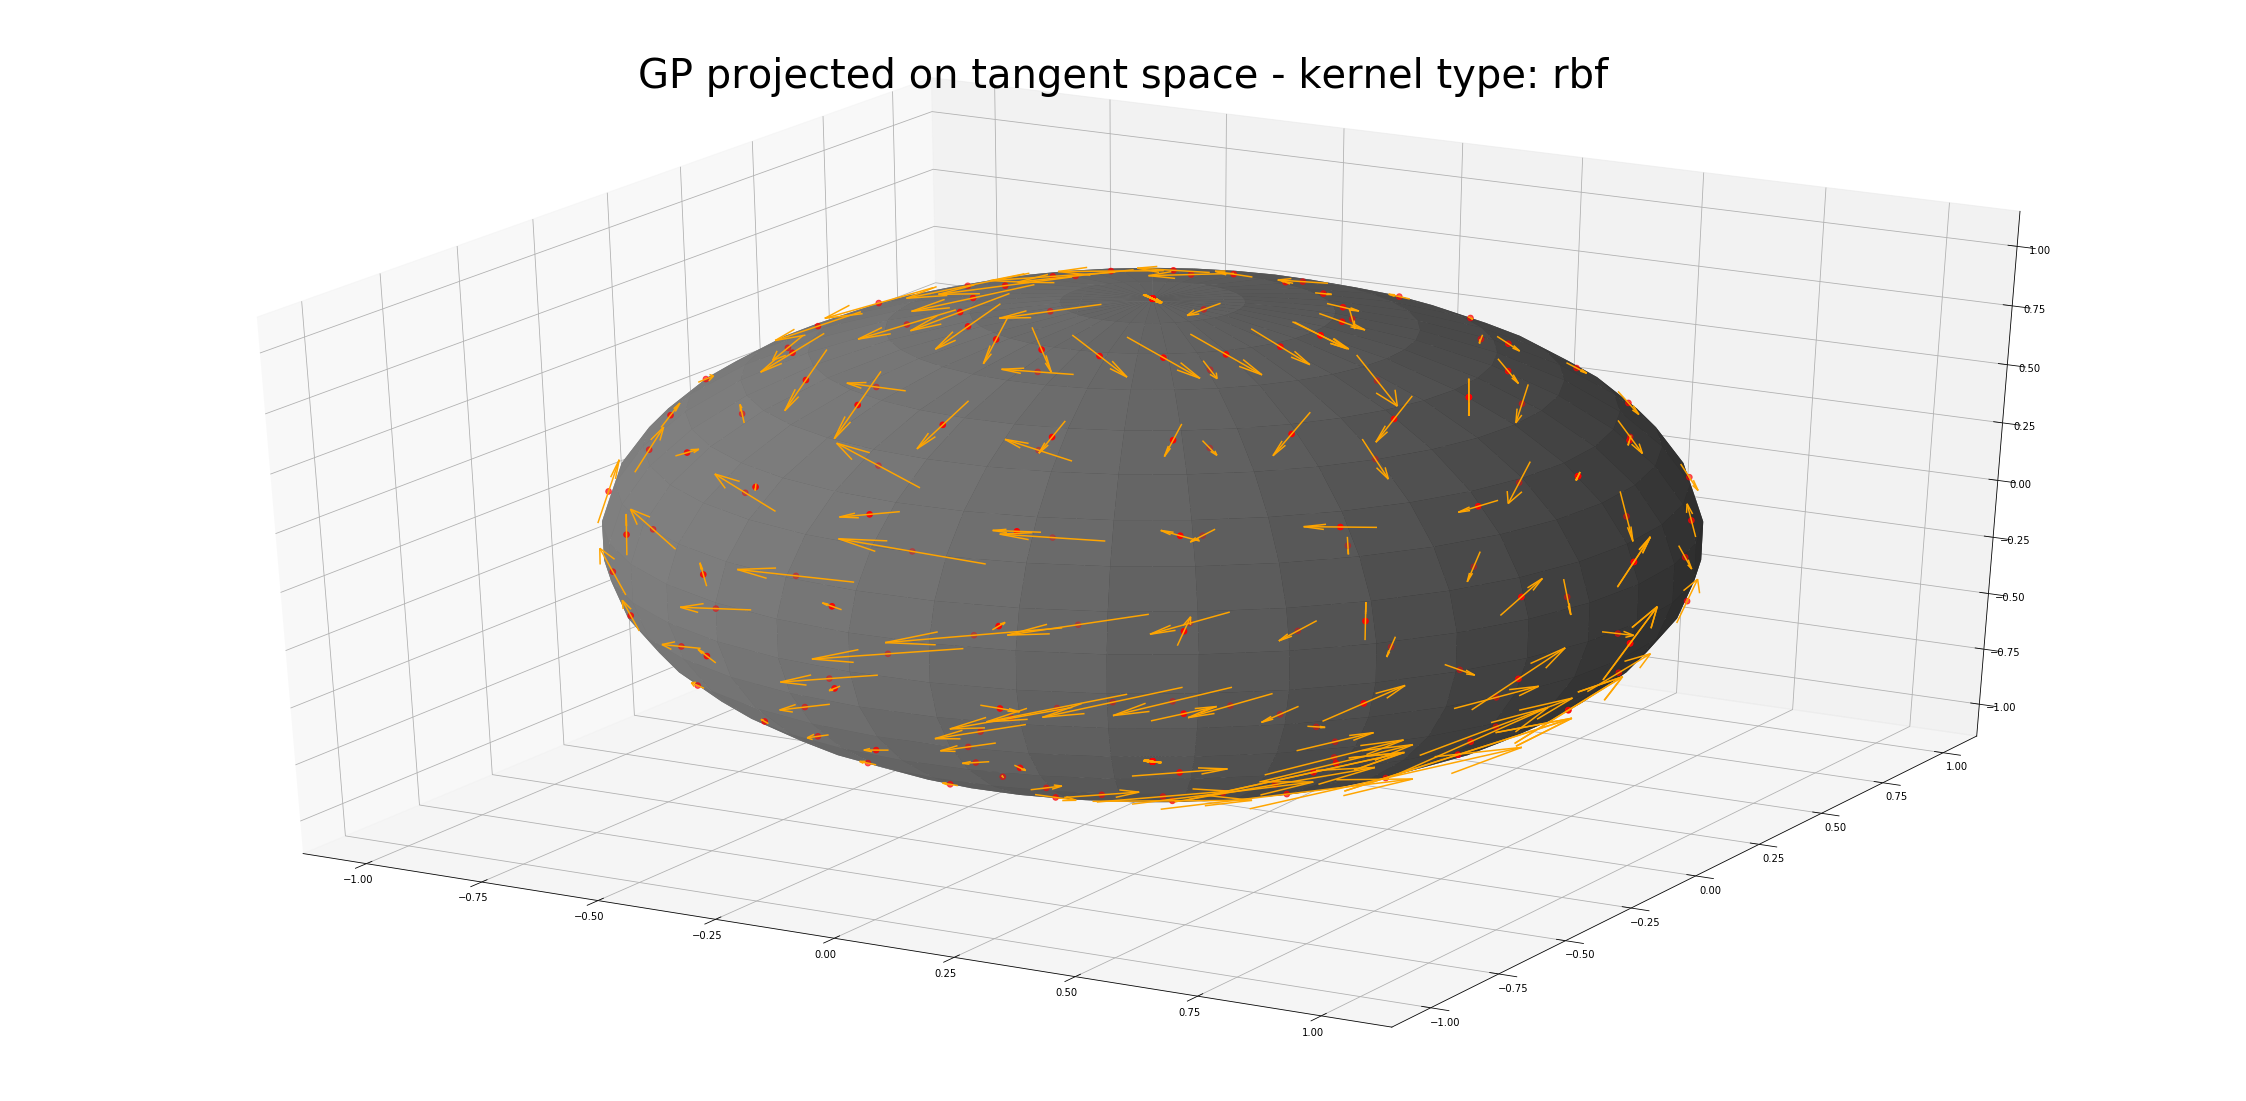

In [43]:
GP.Plot_Spherical_GP(Ker_project=False,obs_noise=1e-4,GP_project=True,kernel_type="rbf",l_scale=0.5)

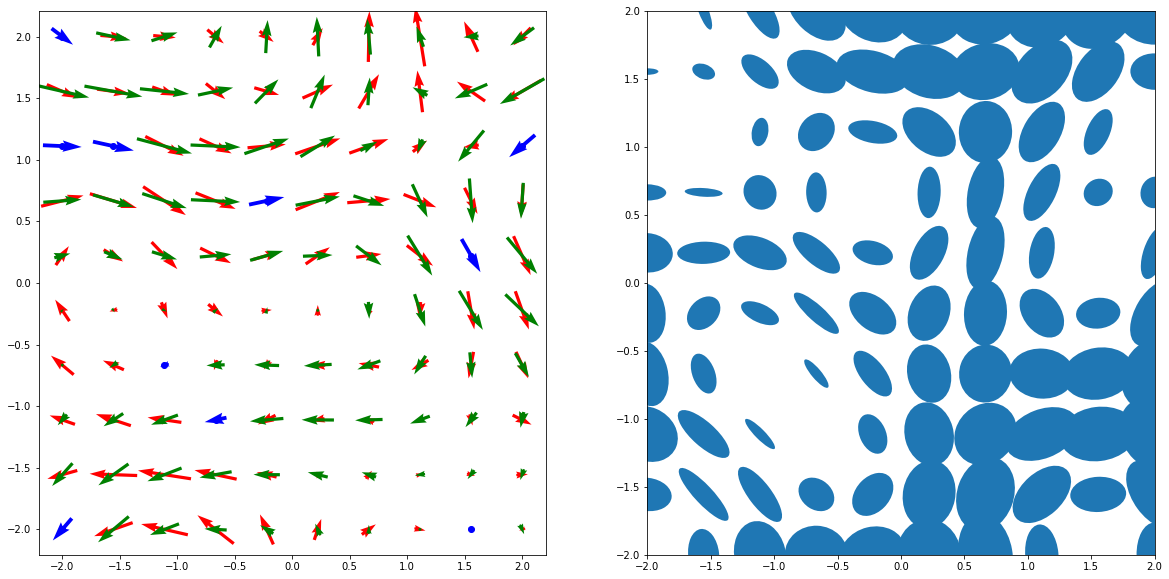

In [44]:
X,Y=GP.vec_GP_sampler_2dim(kernel_type="div_free")
GP.Plot_GP_inference_2d(X,Y,kernel_type="div_free")

In [ ]:
#This functions create n_samples of a GP and saves it as/in "filename"
#We in particular assume that the dimension of the output space is 2, too.
def Data_Sampler_2d(n_samples=10,min_x=-2,max_x=2,n_grid_points=10,l_scale=1,sigma_var=1, 
                        kernel_type="rbf",B=None,Ker_project=False,obs_noise=1e-4):
    X_data=torch.empty((n_samples,n_grid_points**2,2))
    Y_data=torch.empty((n_samples,n_grid_points**2,2))
    for i in range(n_samples):
        X,Y=GP.vec_GP_sampler_2dim(min_x=min_x,max_x=max_x,n_grid_points=n_grid_points,l_scale=l_scale,sigma_var=sigma_var, 
                        kernel_type=kernel_type,B=B,Ker_project=Ker_project,obs_noise=obs_noise)
        X_data[i,:,:]=X
        Y_data[i,:,:]=Y
    return(X_data,Y_data)

#This functions create samples and saves it in a filename:
def Create_GP_Data_File_2d(n_samples=10,min_x=-2,max_x=2,n_grid_points=10,l_scale=1,sigma_var=1, 
                        kernel_type="rbf",B=None,Ker_project=False,obs_noise=1e-4):
    X_data,Y_data=Data_Sampler_2d(n_samples,min_x,max_x,n_grid_points,l_scale,sigma_var, 
                        kernel_type,B,Ker_project,obs_noise)
    if B is None:
        B_string="Id"
    else:
        B_string=str(B.numpy())
    
    Id=str(torch.randint(low=0,high=100000,size=(1,)).item())
    with open('Test_data/2d_GPs/Data_set_information.csv', mode='a',newline='') as data_info_file:
        data_file_writer = csv.writer(data_info_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL,dialect='excel')
        data_file_writer.writerows([["Id","Dimension","N samples","Min_x","Max_x","Kernel type","n_grid_points",
                                     "l_scale","Sigma_var","Ker_project","Obs noise"],
                                    [Id,"2d",str(n_samples),str(min_x),str(max_x),kernel_type,str(n_grid_points),
                                   str(l_scale),str(sigma_var),str(Ker_project),str(obs_noise)]])
    np.save('Test_data/2d_GPs/GP_data_X'+Id, X_data.numpy())
    np.save('Test_data/2d_GPs/GP_data_Y'+Id, Y_data.numpy())

In [102]:
Create_GP_Data_File_2d(n_samples=10000,kernel_type="div_free")